# A MNIST-like fashion product database
In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in 
Keras to solve this and check the accuracy scores.

## Load tensorflow & necessary libraries

In [1]:
import tensorflow as tf
#Check the tensorflow version
print('Tensorflow version : ', tf.__version__)
#Load Keras layers
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization

#Load Model from Keras for Functional Model Building
from tensorflow.keras import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Tensorflow version :  2.4.0


## Load Dataset from Tensorflow API


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Data Preprocessing & EDA

### One-Hot Encoding for the target variables

In [3]:
train_labels =  tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

### Check the shape of both train and test data

In [4]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


### Let us include the class names since the same is not provided by the Tensorflow API by default

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Visualize the train images & their labels

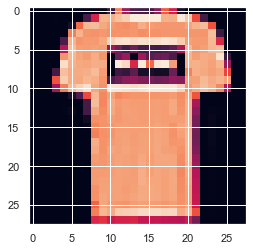

In [6]:
plt.imshow(train_images[1])

In [7]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

C:\Users\koven\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


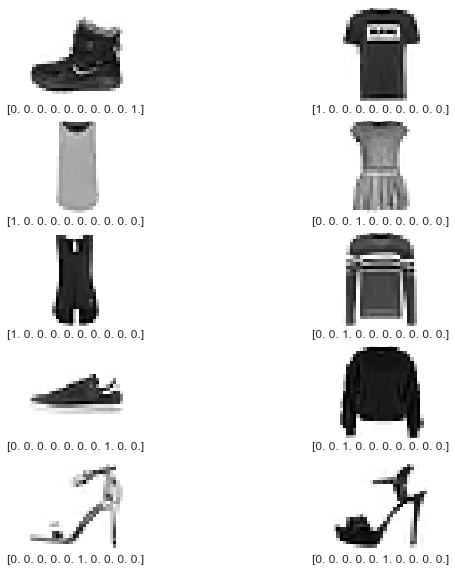

In [8]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Neural Network - Model Building

## Try-out - 1: 
#### -  Input Flatten Layer
#### -  Single Hidden Layer with ReLU activation
#### -  Output layer with 10 neurons (no activation)

In [9]:
#Class Declaration
class FashionMNISTClassifier(Model):
    def __init__(self):
        super(FashionMNISTClassifier, self).__init__()
        self.flatten = Flatten(input_shape=(28, 28))
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10)

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

In [10]:
# Create an instance of the model
model = FashionMNISTClassifier()

In [11]:
print(model)

#### CategoricalCrossEntropy() as loss function and SGD Optimizer as Learning Algorithm

In [12]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0)

#### Compiling the model

In [13]:
model.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['accuracy'])

### Fitting train data

In [14]:
model.fit(train_images,train_labels, validation_split=0.35, epochs=30)

Epoch 1/30
1219/1219 [==============================] - 2s 1ms/step - loss: 8.3427 - accuracy: 0.1025 - val_loss: 8.1488 - val_accuracy: 0.0970
Epoch 2/30
1219/1219 [==============================] - 1s 778us/step - loss: 8.1151 - accuracy: 0.1013 - val_loss: 8.2502 - val_accuracy: 0.0971
Epoch 3/30
1219/1219 [==============================] - 1s 817us/step - loss: 8.1814 - accuracy: 0.1016 - val_loss: 8.0675 - val_accuracy: 0.0972
Epoch 4/30
1219/1219 [==============================] - 1s 796us/step - loss: 8.1053 - accuracy: 0.1025 - val_loss: 8.0675 - val_accuracy: 0.0972
Epoch 5/30
1219/1219 [==============================] - 1s 752us/step - loss: 8.1856 - accuracy: 0.1019 - val_loss: 8.0675 - val_accuracy: 0.0972
Epoch 6/30
1219/1219 [==============================] - 1s 772us/step - loss: 8.1058 - accuracy: 0.1006 - val_loss: 8.0675 - val_accuracy: 0.0972
Epoch 7/30
1219/1219 [==============================] - 1s 769us/step - loss: 8.1247 - accuracy: 0.1012 - val_loss: 8.0675 - v

## Try-out - 2: 
#### -  Input Flatten Layer
#### -  Batch Normalization Layer to normalize the flattened inputs
#### -  Hidden Layer with ReLU activation
#### -  Output layer with 10 neurons (no activation)

In [15]:
class FashionMNISTClassifier1(Model):
    def __init__(self):
        super(FashionMNISTClassifier1, self).__init__()
        self.flatten = Flatten(input_shape=(28, 28))
        self.batchnorm = BatchNormalization(input_shape=(None, 784))
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10)

    def call(self, x):
        x = self.flatten(x)
        print('After flatten ', x.shape)
        print(x.dtype)
        x = self.batchnorm(float(x))
        print('After batchnorm ', x.shape)
        print(x.dtype)
        x = self.d1(x)
        return self.d2(x)

In [16]:
model1 = FashionMNISTClassifier1()

In [17]:
model1.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['accuracy'])

In [18]:
model1.fit(train_images,train_labels, validation_split=0.35, epochs=30)

Epoch 1/30
After flatten  (None, 784)
<dtype: 'uint8'>
After batchnorm  (None, 784)
<dtype: 'float32'>
After flatten  (None, 784)
<dtype: 'uint8'>
After batchnorm  (None, 784)
<dtype: 'float32'>
1207/1219 [============================>.] - ETA: 0s - loss: 8.4510 - accuracy: 0.1291After flatten  (None, 784)
<dtype: 'uint8'>
After batchnorm  (None, 784)
<dtype: 'float32'>
1219/1219 [==============================] - 2s 1ms/step - loss: 8.4441 - accuracy: 0.1290 - val_loss: 8.2426 - val_accuracy: 0.1603
Epoch 2/30
1219/1219 [==============================] - 1s 1ms/step - loss: 8.4714 - accuracy: 0.1680 - val_loss: 8.9565 - val_accuracy: 0.1436
Epoch 3/30
1219/1219 [==============================] - 1s 1ms/step - loss: 8.7682 - accuracy: 0.1512 - val_loss: 9.1958 - val_accuracy: 0.1473
Epoch 4/30
1219/1219 [==============================] - 1s 994us/step - loss: 8.9894 - accuracy: 0.1501 - val_loss: 8.9282 - val_accuracy: 0.1227
Epoch 5/30
1219/1219 [==============================] - 1s 9

## Try-out - 3 
#### -  Input Flatten Layer
#### -  Batch Normalization Layer to normalize the flattened inputs
#### -  Hidden Layer with ReLU activation
#### -  Output layer with 10 neurons (no activation)
#### -  SGD Optimizer tweaked to have learning rate of 0.01

In [19]:
optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)

In [20]:
model1.compile(optimizer=optimizer1,
              loss=loss_object,
              metrics=['accuracy'])

In [21]:
model1.fit(train_images,train_labels, validation_split=0.35, epochs=30)

Epoch 1/30
After flatten  (None, 784)
<dtype: 'uint8'>
After batchnorm  (None, 784)
<dtype: 'float32'>
After flatten  (None, 784)
<dtype: 'uint8'>
After batchnorm  (None, 784)
<dtype: 'float32'>
1158/1219 [===========================>..] - ETA: 0s - loss: 7.6149 - accuracy: 0.1698After flatten  (None, 784)
<dtype: 'uint8'>
After batchnorm  (None, 784)
<dtype: 'float32'>
1219/1219 [==============================] - 2s 1ms/step - loss: 7.6143 - accuracy: 0.1696 - val_loss: 7.6369 - val_accuracy: 0.1607
Epoch 2/30
1219/1219 [==============================] - 2s 1ms/step - loss: 7.6389 - accuracy: 0.1657 - val_loss: 7.6384 - val_accuracy: 0.1608
Epoch 3/30
1219/1219 [==============================] - 2s 1ms/step - loss: 7.6921 - accuracy: 0.1584 - val_loss: 7.6584 - val_accuracy: 0.1621
Epoch 4/30
1219/1219 [==============================] - 2s 1ms/step - loss: 7.5514 - accuracy: 0.1667 - val_loss: 7.6684 - val_accuracy: 0.1621
Epoch 5/30
1219/1219 [==============================] - 1s 1ms

## Try-out - 4 - Final 
#### -  Input Flatten Layer
#### -  Batch Normalization Layer to normalize the flattened inputs
#### -  Three Hidden Layers with 100 neurons each with ReLU activation
#### -  Output layer with 10 neurons with Softmax activation
#### -  SGD Optimizer with learning rate of 0.03; Categorical Cross-Entropy as Loss function

In [22]:
class FashionMNISTClassifier2(Model):
    def __init__(self):
        super(FashionMNISTClassifier2, self).__init__()
        self.flatten = Flatten(input_shape=(28, 28))
        self.batchnorm = BatchNormalization(input_shape=(None, 784))
        self.d1 = Dense(100, activation='relu')
        self.d2 = Dense(100, activation='relu')
        self.d3 = Dense(100, activation='relu')
        self.d4 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        print('After flatten ', x.shape)
        print(x.dtype)
        x = self.batchnorm(float(x))
        print('After batchnorm ', x.shape)
        print(x.dtype)
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        return self.d4(x)

## Compile & Fit the finalized Model

In [23]:
model2 = FashionMNISTClassifier2()

In [24]:
optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.0)

In [25]:
model2.compile(optimizer=optimizer2,
              loss=loss_object,
              metrics=['accuracy'])

In [26]:
model2.fit(train_images, train_labels, validation_split=0.30, epochs=100)

Epoch 1/100
After flatten  (None, 784)
<dtype: 'uint8'>
After batchnorm  (None, 784)
<dtype: 'float32'>
After flatten  (None, 784)
<dtype: 'uint8'>
After batchnorm  (None, 784)
<dtype: 'float32'>
1275/1313 [============================>.] - ETA: 0s - loss: 0.7564 - accuracy: 0.7346After flatten  (None, 784)
<dtype: 'uint8'>
After batchnorm  (None, 784)
<dtype: 'float32'>
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7505 - accuracy: 0.7365 - val_loss: 0.4553 - val_accuracy: 0.8251
Epoch 2/100
1313/1313 [==============================] - 1s 949us/step - loss: 0.4123 - accuracy: 0.8482 - val_loss: 0.3881 - val_accuracy: 0.8558
Epoch 3/100
1313/1313 [==============================] - 1s 939us/step - loss: 0.3585 - accuracy: 0.8702 - val_loss: 0.3779 - val_accuracy: 0.8609
Epoch 4/100
1313/1313 [==============================] - 1s 938us/step - loss: 0.3314 - accuracy: 0.8749 - val_loss: 0.3581 - val_accuracy: 0.8714
Epoch 5/100
1313/1313 [=============================

Epoch 54/100
1313/1313 [==============================] - 1s 943us/step - loss: 0.0793 - accuracy: 0.9703 - val_loss: 0.5221 - val_accuracy: 0.8799
Epoch 55/100
1313/1313 [==============================] - 1s 948us/step - loss: 0.0762 - accuracy: 0.9729 - val_loss: 0.6097 - val_accuracy: 0.8706
Epoch 56/100
1313/1313 [==============================] - 1s 961us/step - loss: 0.0836 - accuracy: 0.9679 - val_loss: 0.5093 - val_accuracy: 0.8861
Epoch 57/100
1313/1313 [==============================] - 1s 943us/step - loss: 0.0761 - accuracy: 0.9721 - val_loss: 0.4945 - val_accuracy: 0.8873
Epoch 58/100
1313/1313 [==============================] - 1s 944us/step - loss: 0.0789 - accuracy: 0.9726 - val_loss: 0.5112 - val_accuracy: 0.8852
Epoch 59/100
1313/1313 [==============================] - 1s 952us/step - loss: 0.0733 - accuracy: 0.9739 - val_loss: 0.5299 - val_accuracy: 0.8843
Epoch 60/100
1313/1313 [==============================] - 1s 953us/step - loss: 0.0752 - accuracy: 0.9723 - val_

In [27]:
model2.summary()

Model: "fashion_mnist_classifier2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  3136      
_________________________________________________________________
dense_4 (Dense)              multiple                  78500     
_________________________________________________________________
dense_5 (Dense)              multiple                  10100     
_________________________________________________________________
dense_6 (Dense)              multiple                  10100     
_________________________________________________________________
dense_7 (Dense)              multiple                  1010      
Total params: 102,846
Trainable params: 101,278
Non-trainable params: 1,568
_______________________________